# Problem Statement

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

An NBFI is struggling to mark profits due to an increase in defaults in the vehicle loan category. The company aims to determine the client’s loan repayment abilities and understand the relative importance of each parameter contributing to a borrower’s ability to repay the loan. 
 
**Goal**:
The goal of the problem is to predict whether a client will default on the vehicle loan payment or not. For each ID in the Test_Dataset, you must predict the “Default” level.

**Datasets**
The problem contains two datasets, Train_Dataset and Test_Dataset. Model building is to be done on Train_Dataset and the Model testing is to be done on Test_Dataset. The output from the Test_Dataset is to be submitted to the Hackathon platform.

**Metric to measure**
The metric to measure is the F1_Score. F1_Score is the harmonic mean of Recall and Precision. In this Hackathon, you will get the F1_Score of 1. Please visit the link for more details on F1_Score- https://en.wikipedia.org/wiki/F-score


In [1]:
#Lets import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SMOTE to balance the Imbalance Data
from imblearn.over_sampling import SMOTE

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split

In [2]:
#Lets read datasets
train = pd.read_csv("Train_Dataset.csv")
test = pd.read_csv("Test_Dataset.csv")

C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### DATA PREPERATION & DATA UNDERSTANDING

In [3]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

train['temp_col'] = 'train'
test['temp_col']='test'

df = pd.concat([train,test], axis =0)

# df.head()

In [4]:
# df.Car_Owned.value_counts()

In [5]:
# Data types info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               196715 non-null  object 
 2   Car_Owned                   196770 non-null  float64
 3   Bike_Owned                  196646 non-null  float64
 4   Active_Loan                 196667 non-null  float64
 5   House_Own                   196748 non-null  float64
 6   Child_Count                 196790 non-null  float64
 7   Credit_Amount               196837 non-null  object 
 8   Loan_Annuity                194741 non-null  object 
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender  

************************************************************
**1. MISSING DATA TREATMENT**

In [6]:
# df.isnull().sum()
round(100*(df.isnull().sum()/len(df.index)), 2)

ID                             0.00
Client_Income                  2.98
Car_Owned                      2.95
Bike_Owned                     3.01
Active_Loan                    3.00
House_Own                      2.96
Child_Count                    2.94
Credit_Amount                  2.92
Loan_Annuity                   3.95
Accompany_Client               1.46
Client_Income_Type             3.06
Client_Education               2.96
Client_Marital_Status          2.92
Client_Gender                  1.99
Loan_Contract_Type             2.95
Client_Housing_Type            3.01
Population_Region_Relative     4.01
Age_Days                       3.00
Employed_Days                  2.99
Registration_Days              2.97
ID_Days                        4.86
Own_House_Age                 65.93
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.17
Client_Family_Members          2.00
Cleint_City_Rating          

In [7]:
# df.Type_Organization.value_counts()

In [8]:
#Lets remove variables with more than ~25% of missing values
df =  df.drop(['Own_House_Age','Client_Occupation','Score_Source_1','Social_Circle_Default','Score_Source_3','Type_Organization'],1)

In [9]:
#Mising value analyis and treatment for continuous variables

df.select_dtypes(include=['float64','int64']).isnull().sum()

ID                              0
Car_Owned                    5986
Bike_Owned                   6110
Active_Loan                  6089
House_Own                    6008
Child_Count                  5966
Mobile_Tag                      0
Homephone_Tag                   0
Workphone_Working               0
Client_Family_Members        4054
Cleint_City_Rating           4040
Application_Process_Day      3967
Application_Process_Hour     6069
Phone_Change                 6087
Credit_Bureau               30822
Default                     80900
dtype: int64

In [10]:
#lets Replace Ys and Ns to 1s and 0s

# df.loc[df.Car_Owned == 'N', 'Car_Owned'] = 0
# df.loc[df.Car_Owned == 'Y', 'Car_Owned'] = 1

df.Car_Owned.fillna(df.Car_Owned.mode()[0], inplace=True)
df.Car_Owned.unique()



array([0., 1.])

In [11]:
# df['Bike_Owned'] = df['Bike_Owned'].map({'N':0,'Y':1})
# df['Active_Loan'] = df['Active_Loan'].map({'N':0,'Y':1})
# df['House_Own'] = df['House_Own'].map({'N':0, 'Y':1})


df['Bike_Owned'].fillna(df.Bike_Owned.mode()[0],inplace=True)
df['Active_Loan'].fillna(df.Active_Loan.mode()[0],inplace=True)
df['House_Own'].fillna(df.House_Own.mode()[0],inplace=True)

In [12]:
#Lets treat continuos variables and impute median as missing values.

# income_mean = np.mean(df.Client_Income[(df.Client_Income != '$') & (df.Client_Income != '#')].astype(float))
income_median = (df.Client_Income[(df.Client_Income != '$') & (df.Client_Income != '#')].astype(float)).median()

df.loc[df['Client_Income'] == '$', 'Client_Income'] = income_median
df.loc[df['Client_Income'] == '#', 'Client_Income'] = income_median
df['Client_Income'].fillna(df['Client_Income'].median(),inplace=True)

df.Client_Income = df.Client_Income.astype(float)
df.Client_Income.isnull().sum()

0

In [13]:
#Child_Count
df.Child_Count.fillna(df.Child_Count.median(),inplace=True)


#Credit Amount
cr_amt_median = (df.Credit_Amount[(df.Credit_Amount != '$')].astype(float)).median()

df.loc[df.Credit_Amount == '$', 'Credit_Amount'] =cr_amt_median
df.Credit_Amount.fillna(df.Credit_Amount.median(),inplace=True)
df.Credit_Amount = df.Credit_Amount.astype(float)


#Loan Annuity
la_median = (df.Loan_Annuity[(df.Loan_Annuity !='$') & (df.Loan_Annuity != '#VALUE!')].astype(float)).median()
df.loc[df.Loan_Annuity == '$','Loan_Annuity'] = la_median
df.loc[df.Loan_Annuity == '#VALUE!', 'Loan_Annuity'] = la_median

df.Loan_Annuity.fillna(df.Loan_Annuity.median(),inplace=True)
df.Loan_Annuity = df.Loan_Annuity.astype(float)

#Population Region Rel.
##pop_mean = np.mean(df.Population_Region_Relative[(df.Population_Region_Relative != '@') & (df.Population_Region_Relative != '#')].astype(float))
pop_median = (df.Population_Region_Relative[(df.Population_Region_Relative != '@') & (df.Population_Region_Relative != '#')].astype(float)).median()

df.loc[df['Population_Region_Relative'] == '@', 'Population_Region_Relative'] = pop_median
df.loc[df['Population_Region_Relative'] == '#', 'Population_Region_Relative'] = pop_median
df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median(),inplace=True)

df.Population_Region_Relative = df.Population_Region_Relative.astype(float)


# Age Days
agedays_median = (df.Age_Days[(df.Age_Days != 'x')].astype(float)).median()

df.loc[df['Age_Days'] == 'x', 'Age_Days'] = agedays_median
df['Age_Days'].fillna(df['Age_Days'].median(),inplace=True)

df.Age_Days = df.Age_Days.astype(float)


#Employed Days
empdays_median = (df.Employed_Days[(df.Employed_Days != 'x')].astype(float)).median()

df.loc[df['Employed_Days'] == 'x', 'Employed_Days'] = empdays_median
df['Employed_Days'].fillna(df['Employed_Days'].median(),inplace=True)

df.Employed_Days = df.Employed_Days.astype(float)


#Registration Days
regdays_median = (df.Registration_Days[(df.Registration_Days != 'x')].astype(float)).median()

df.loc[df['Registration_Days'] == 'x', 'Registration_Days'] = regdays_median
df['Registration_Days'].fillna(df['Registration_Days'].median(),inplace=True)

df.Registration_Days = df.Registration_Days.astype(float)


#ID Days
iddays_median = (df.ID_Days[(df.ID_Days != 'x')].astype(float)).median()

df.loc[df['ID_Days'] == 'x', 'ID_Days'] = iddays_median
df['ID_Days'].fillna(df['ID_Days'].median(),inplace=True)

df.ID_Days = df.ID_Days.astype(float)


#source score
score_median = (df.Score_Source_2[(df.Score_Source_2 != '#')].astype(float)).median()

df.loc[df['Score_Source_2'] == '#', 'Score_Source_2'] = iddays_median
df['Score_Source_2'].fillna(df['Score_Source_2'].median(),inplace=True)

df.Score_Source_2 = df.Score_Source_2.astype(float)


#Other Vars

df.Client_Family_Members.fillna(df.Client_Family_Members.median(),inplace=True)
df.Cleint_City_Rating.fillna(df.Cleint_City_Rating.median(),inplace=True)
df.Application_Process_Hour.fillna(df.Application_Process_Hour.median(),inplace=True)
df.Phone_Change.fillna(df.Phone_Change.median(),inplace=True)
df.Credit_Bureau.fillna(df.Credit_Bureau.median(),inplace=True)
df.Application_Process_Day.fillna(df.Application_Process_Day.median(),inplace=True)


In [14]:
# df.Car_Owned.value_counts()

In [15]:
# regex = "[^0-9]+"
# series = df["Loan_Annuity"]
# df1 = series.str.contains(regex)

# df1['Loan_Annuity']=df['Loan_Annuity'].str.extract(r'([^0-9]+)')
# df1.Loan_Annuity.unique()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender  

In [17]:
df.select_dtypes(include=['float64','int64']).isnull().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Family_Members             0
Cleint_City_Rating                0
Application_Process_Day           0
Application_Process_Hour          0
Score_Source_2                    0
Phone_Change                      0
Credit_Bureau                     0
Default                       80900
dtype: int64

**********************************************************************
**2.OUTLIER TREATMENT FOR CONTINOUS VARIABLES**

In [18]:
df.select_dtypes(include=['float64','int64']).iloc[:,:13].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

# df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days
count,2.027560e+05,2.027560e+05,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000
mean,1.219266e+07,1.679182e+04,0.330806,0.322249,0.483665,0.701646,0.405724,59752.351931,2706.952544,0.023267,16028.912205,65550.829435,4966.159591
std,4.977689e+04,1.164936e+04,0.470505,0.467339,0.499734,0.457537,0.720372,39708.490199,1425.017820,0.496669,4300.239455,137614.101204,3466.000763
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,198.000000,0.000533,7673.000000,0.000000,0.000000
1%,1.210203e+07,4.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,7650.000000,630.900000,0.002134,8284.550000,117.000000,53.000000
5%,1.211014e+07,6.750000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,13950.000000,900.000000,0.005002,9457.000000,232.000000,344.000000
10%,1.212028e+07,8.100000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,18000.000000,1125.000000,0.006671,10327.000000,402.000000,716.000000
25%,1.215069e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27450.000000,1687.500000,0.010032,12528.750000,964.000000,2104.000000
50%,1.220069e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51477.750000,2493.900000,0.018850,15740.000000,2219.000000,4493.000000
75%,1.223021e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3404.250000,0.026392,19573.000000,5403.000000,7352.000000


In [19]:
df.Phone_Change.describe(percentiles=[.01,.05,.1,.15,.17,.2,.25,.5,.75,.82,.83,.85,.9,.95,.99])

count    202756.000000
mean        955.463172
std         816.175889
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
15%           7.000000
17%          65.000000
20%         174.000000
25%         286.000000
50%         755.000000
75%        1549.000000
82%        1762.000000
83%        1798.000000
85%        1871.000000
90%        2142.000000
95%        2512.000000
99%        3136.000000
max        4292.000000
Name: Phone_Change, dtype: float64

In [20]:
df.loc[df.Client_Income > 46800, 'Client_Income'] = 46800
df.loc[df.Child_Count > 3,'Child_Count'] = 3
df.loc[df.Credit_Amount > 182448, 'Credit_Amount'] = 182448
df.loc[df.Loan_Annuity > 6975.45, 'Loan_Annuity'] = 6975.45
df.loc[df.Population_Region_Relative >= 0.072508, 'Population_Region_Relative'] = 0.072508
df.loc[df.Registration_Days > 13817.000000, 'Registration_Days'] = 13817.000000
df.loc[df.Client_Family_Members > 5, 'Client_Family_Members'] = 5
df.loc[df.Score_Source_2 > 0.7823405, 'Score_Source_2'] = 0.7823405
# df.loc[df.Phone_Change < 10, 'Phone_Change'] = 10
df.loc[df.Credit_Bureau > 8, 'Credit_Bureau'] = 8
df.loc[df.ID_Days > 5429,'ID_Days'] = 5429
df.loc[df.Application_Process_Hour > 19,'Application_Process_Hour'] = 19
df.loc[df.Employed_Days > 11842.1, 'Employed_Days'] = 11842.1
df.loc[df.Registration_Days > 13844.0, 'Registration_Days'] = 13844.0



df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Credit_Bureau,Default
count,202756.000000,202756.000000,202756.000000,202756.00000,202756.000000,202756.000000,202756.000000,202756.000000,2.027560e+05,202756.000000,202756.000000,121856.000000
mean,3003.350268,0.999995,0.200221,0.28049,2.148129,2.029311,3.155823,12.055550,5.161533e-01,955.463172,1.752205,0.080792
std,1469.891778,0.002221,0.400167,0.44924,0.891746,0.498370,1.740195,3.201091,1.869345e-01,816.175889,1.720398,0.272517
min,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,8.170000e-08,0.000000,0.000000,0.000000
1%,66.550000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,4.000000,3.176975e-02,0.000000,0.000000,0.000000
5%,390.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,7.000000,1.383969e-01,0.000000,0.000000,0.000000
10%,757.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,8.000000,2.238476e-01,0.000000,0.000000,0.000000
25%,1797.000000,1.000000,0.000000,0.00000,2.000000,2.000000,2.000000,10.000000,4.029593e-01,286.000000,1.000000,0.000000
50%,3256.000000,1.000000,0.000000,0.00000,2.000000,2.000000,3.000000,12.000000,5.651609e-01,755.000000,1.000000,0.000000
75%,4267.000000,1.000000,0.000000,1.00000,3.000000,2.000000,5.000000,14.000000,6.595351e-01,1549.000000,3.000000,0.000000


*****************************************
**3.MISSING DATA TREATMENT FOR CATEGORICAL VARIABLES**

In [21]:
df.select_dtypes(include=['object']).isnull().sum()

Accompany_Client              2954
Client_Income_Type            6202
Client_Education              5995
Client_Marital_Status         5916
Client_Gender                 4040
Loan_Contract_Type            5972
Client_Housing_Type           6095
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
temp_col                         0
dtype: int64

In [22]:
print(df.Client_Permanent_Match_Tag.value_counts())
print(df.Client_Contact_Work_Tag.value_counts())

Yes    187051
No      15705
Name: Client_Permanent_Match_Tag, dtype: int64
Yes    166318
No      36438
Name: Client_Contact_Work_Tag, dtype: int64


In [23]:
# train.Employed_Days.value_counts()

df.loc[train.Accompany_Client == '##', 'Accompany_Client'] = 'Unaccompanied'
df.Accompany_Client.fillna(train.Accompany_Client.mode()[0],inplace=True)

# train.Type_Organization.value_counts()

df.Client_Income_Type.fillna(df.Client_Income_Type.mode()[0],inplace=True)
df.Client_Education.fillna(df.Client_Education.mode()[0],inplace=True)
df.Client_Housing_Type.fillna(df.Client_Housing_Type.mode()[0],inplace=True)
df.Client_Gender.fillna(df.Client_Gender.mode()[0],inplace=True)
df.Client_Marital_Status.fillna(df.Client_Marital_Status.mode()[0],inplace=True)
df.Loan_Contract_Type.fillna(df.Loan_Contract_Type.mode()[0],inplace=True)


#Converting Yes's and NOs to 1s and 0s
df['Client_Permanent_Match_Tag'] = df['Client_Permanent_Match_Tag'].map({'No':0,'Yes':1})
df['Client_Contact_Work_Tag'] = df['Client_Contact_Work_Tag'].map({'No':0,'Yes':1})


In [24]:
df.select_dtypes(include=['object']).isnull().sum()

Accompany_Client         0
Client_Income_Type       0
Client_Education         0
Client_Marital_Status    0
Client_Gender            0
Loan_Contract_Type       0
Client_Housing_Type      0
temp_col                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            202756 non-null  object 
 10  Client_Income_Type          202756 non-null  object 
 11  Client_Education            202756 non-null  object 
 12  Client_Marital_Status       202756 non-null  object 
 13  Client_Gender  

### Dummy variable creation

In [26]:
# xd = pd.get_dummies(df,drop_first=True)

In [27]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
acc_clint = pd.get_dummies(df['Accompany_Client'],prefix='Accompany_Client',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,acc_clint],axis=1)

Inc_type = pd.get_dummies(df['Client_Income_Type'],prefix='Client_Income_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,Inc_type],axis=1)

# org = pd.get_dummies(train['Type_Organization'],prefix='Type_Organization',drop_first=True)
# #Adding the results to the master dataframe
# train = pd.concat([train,org],axis=1)

edu = pd.get_dummies(df['Client_Education'],prefix='Client_Education',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,edu],axis=1)

mar = pd.get_dummies(df['Client_Marital_Status'],prefix='Client_Marital_Status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,mar],axis=1)

gender = pd.get_dummies(df['Client_Gender'],prefix='Client_Gender',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,gender],axis=1)

cont = pd.get_dummies(df['Loan_Contract_Type'],prefix='Loan_Contract_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

house = pd.get_dummies(df['Client_Housing_Type'],prefix='Client_Housing_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,house],axis=1)





In [28]:
df = df.drop(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type'],1)

### Feature Standardization

In [29]:
# df.iloc[:,30:].describe()

In [30]:
df1 = df[['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days','Employed_Days','Registration_Days','ID_Days',
          'Client_Family_Members','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Phone_Change','Credit_Bureau']]

In [31]:
normalized_df=(df1-df1.mean())/df1.std()

In [32]:
df = df.drop(['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days','Employed_Days','Registration_Days','ID_Days',
              'Client_Family_Members','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Phone_Change','Credit_Bureau'],1)

In [33]:
df = pd.concat([df,normalized_df],axis=1)

In [34]:
df.isnull().sum()

ID                                         0
Car_Owned                                  0
Bike_Owned                                 0
Active_Loan                                0
House_Own                                  0
Population_Region_Relative                 0
Mobile_Tag                                 0
Homephone_Tag                              0
Workphone_Working                          0
Client_Permanent_Match_Tag                 0
Client_Contact_Work_Tag                    0
Score_Source_2                             0
Default                                80900
temp_col                                   0
Accompany_Client_Alone                     0
Accompany_Client_Group                     0
Accompany_Client_Kids                      0
Accompany_Client_Others                    0
Accompany_Client_Partner                   0
Accompany_Client_Relative                  0
Accompany_Client_Unaccompanied             0
Client_Income_Type_Commercial              0
Client_Inc

In [35]:
# Now that we have cleand the data, lets spit back the data into Train and Test. (Data was already split, I had combind to clean and repare the data)

X = df[df['temp_col']=='train']
y=X['Default']
X=X.drop(['ID','temp_col','Default'],axis=1)

test_df =df[df['temp_col']=='test']
test_df =test_df.drop(['temp_col','Default'],1)
print(X.shape,test_df.shape)

(121856, 56) (80900, 57)


C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


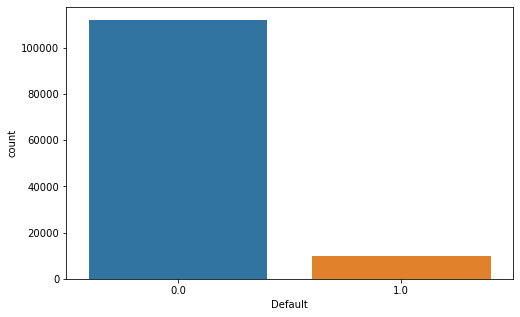

In [36]:
#lETS CALCULATE THE DEFAULT RATE

fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(pd.Series(y),ax=ax)
plt.show()

In [42]:
print(round(((sum(y)/len(y))*100),2),'%')

8.08 %


**We have just over 8% of Loan Defaulters**

### Balancing the dataset using the SMOTE

C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


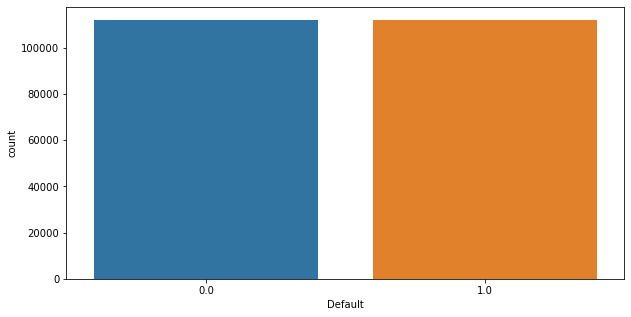

In [43]:
#Importing the imblearn
# import imblearn
# from imblearn.over_sampling import SMOTE #Importing SMOTE

x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(X,y) #resample fit

#Count plot
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resam),ax=ax)
plt.show()

### Model Building

In [44]:
import statsmodels.api as sm

# Logistic regression model
np.seterr(divide='ignore', invalid='ignore')

logm1 = sm.GLM(y_resam,(sm.add_constant(x_resam)), family = sm.families.Binomial())
logm1.fit().summary()


C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:               224022
Model:                            GLM   Df Residuals:                   223967
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 22 Apr 2021   Deviance:                          nan
Time:                        14:24:29   Pearson chi2:                 3.66e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                1.093e+15   6.71e+07   1.63e+07      0.000    1.09e+15    1.09e+15
Car_Owned                           -2.492e+14   3.48e+05  -7.16e+08      0.000   -2.49e+14   -2.49e+14
Bike_Owned                          -5.468e+13   3.21e+05  -1.71e+08      0.000   -5.47e+13   -5.47e+13
Active_Loan                         -3.677e+13   2.97e+05  -1.24e+08      0.000   -3.68e+13   -3.68e+13
House_Own                            1.522e+14   3.45e+05   4.41e+08      0.000    1.52e+14    1.52e+14
Population_Region_Relative           1.594e+15   1.36e+07   1.17e+08      0.000    1.59e+15    1.59e+15
Mobile_Tag                           5.123e+15   6.71e+07   7.63e+07      0.000    5.12e+15    5.12e+15
Homephone_Tag                       -2.435e+14   4.19e+05  -5.81e+08      0.000   -2.43e+14   -2.43e+14
Workphone_Working                   -5.385e+14   3.78e+05  -1.42e+09      0.000   -5.39e+14   -5.39e+14
Client_Permanent_Match_Tag           6.662e+13   4.65e+05   1.43e+08      0.000    6.66e+13    6.66e+13
Client_Contact_Work_Tag             -9.066e+13   3.53e+05  -2.57e+08      0.000   -9.07e+13   -9.07e+13
Score_Source_2                       -9.79e+14   8.31e+05  -1.18e+09      0.000   -9.79e+14   -9.79e+14
Accompany_Client_Alone              -3.281e+15   6.05e+05  -5.43e+09      0.000   -3.28e+15   -3.28e+15
Accompany_Client_Group              -4.879e+15   6.58e+06  -7.42e+08      0.000   -4.88e+15   -4.88e+15
Accompany_Client_Kids               -4.497e+15   1.88e+06  -2.39e+09      0.000    -4.5e+15    -4.5e+15
Accompany_Client_Others             -4.447e+15   2.15e+06  -2.07e+09      0.000   -4.45e+15   -4.45e+15
Accompany_Client_Partner            -4.195e+15   1.09e+06  -3.85e+09      0.000    -4.2e+15    -4.2e+15
Accompany_Client_Relative           -3.719e+15   7.44e+05     -5e+09      0.000   -3.72e+15   -3.72e+15
Accompany_Client_Unaccompanied      -4.508e+15   1.94e+07  -2.33e+08      0.000   -4.51e+15   -4.51e+15
Client_Income_Type_Commercial       -1.844e+15   6.43e+05  -2.87e+09      0.000   -1.84e+15   -1.84e+15
Client_Income_Type_Govt Job         -2.434e+15   8.89e+05  -2.74e+09      0.000   -2.43e+15   -2.43e+15
Client_Income_Type_Maternity leave  -5.034e+15   4.75e+07  -1.06e+08      0.000   -5.03e+15   -5.03e+15
Client_Income_Type_Retired          -1.012e+15   9.37e+05  -1.08e+09      0.000   -1.01e+15   -1.01e+15
Client_Income_Type_Service          -1.567e+15   5.81e+05   -2.7e+09      0.000   -1.57e+15   -1.57e+15
Client_Income_Type_Student          -6.761e+15   2.37e+07  -2.85e+08      0.000   -6.76e+15   -6.76e+15
Client_Income_Type_Unemployed       -2.065e+15   2.74e+07  -7.53e+07      0.000   -2.06e+15   -2.06e+15
Client_Education_Graduation dropout -8.362e+14   1.02e+06  -8.19e+0

In [45]:
round(X.corr(),1)

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Population_Region_Relative,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,...,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Phone_Change,Credit_Bureau
Car_Owned,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.1,...,-0.1,-0.1,-0.1,-0.0,0.1,-0.0,-0.0,0.0,0.0,-0.0
Bike_Owned,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
Active_Loan,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
House_Own,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.1,-0.0,0.1,0.0,...,0.1,0.1,0.0,-0.0,0.0,0.0,0.0,-0.1,-0.0,0.1
Population_Region_Relative,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,0.1,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.5,-0.0,0.2,0.0,0.0
Mobile_Tag,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
Homephone_Tag,0.0,-0.0,0.0,-0.1,-0.0,0.0,1.0,0.3,-0.0,-0.1,...,-0.2,-0.2,-0.1,-0.0,0.1,0.0,-0.0,0.0,0.0,-0.1
Workphone_Working,-0.0,-0.0,-0.0,-0.0,0.1,0.0,0.3,1.0,0.0,0.0,...,0.0,0.0,0.1,0.0,-0.0,-0.1,-0.0,0.1,0.1,-0.0
Client_Permanent_Match_Tag,-0.0,-0.0,0.0,0.1,0.0,-0.0,-0.0,0.0,1.0,0.0,...,0.2,0.1,0.1,0.1,-0.0,-0.0,0.0,-0.0,0.1,0.0
Client_Contact_Work_Tag,-0.1,-0.0,0.0,0.0,0.0,-0.0,-0.1,0.0,0.0,1.0,...,0.2,0.2,0.1,0.1,-0.1,-0.0,0.0,-0.0,0.0,0.0


In [47]:
# X['Client_Education_junior secondary'].value_counts()

**NOTE: It's very difficult to analyze the correlations from the above table, lets visualise from the below heatmap chart**

<AxesSubplot:>

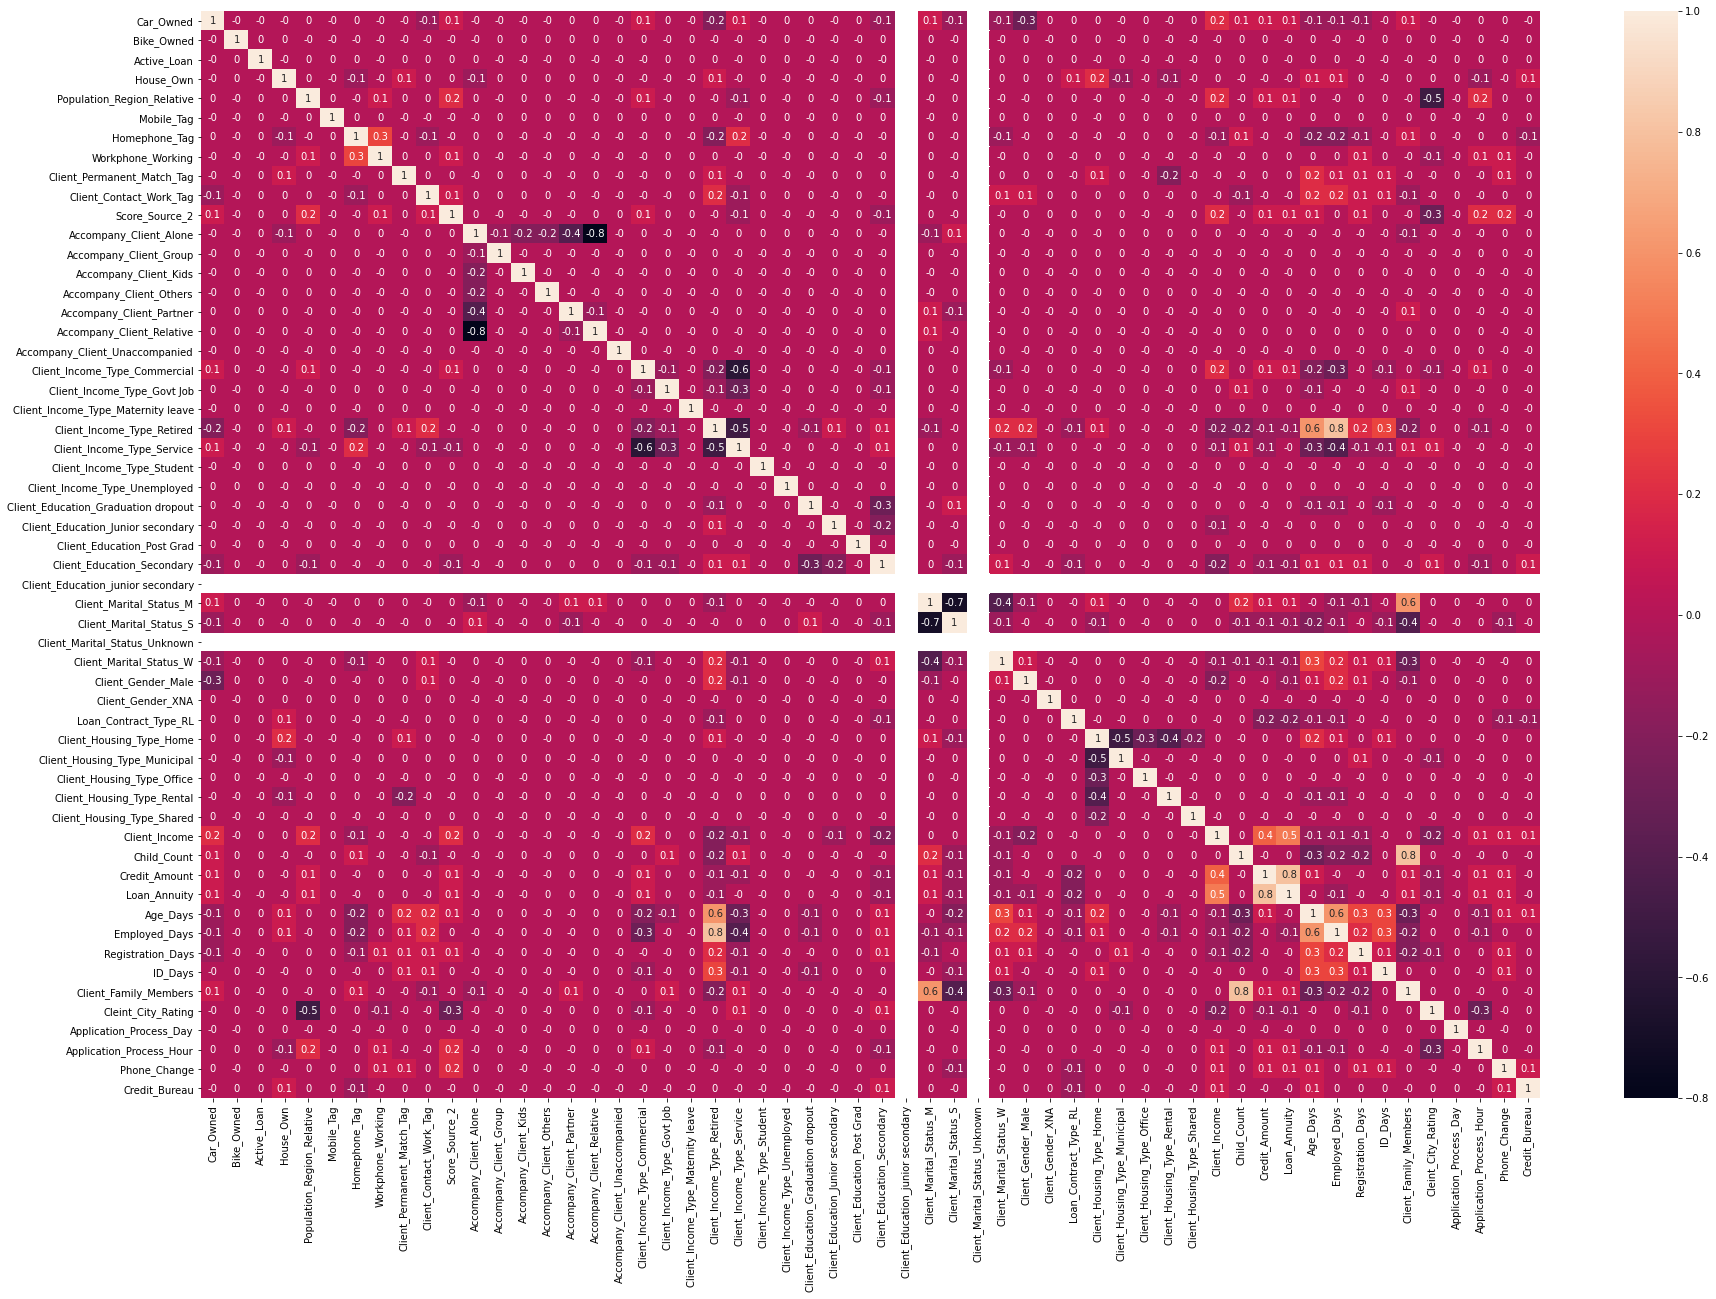

In [48]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(round(X.corr(),1),annot = True)

In [49]:
# def correlation(dataset, threshold):
#     col_corr = set()
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i,j]) > threshold:
#                 colname = corr_matrix.columns[i]
#                 col_corr.add(colname)
#         return col_corr

In [50]:
# corr_features = correlation(X,0.5)
# len(set(corr_features))

In [46]:
x_resam = x_resam.drop(['Client_Education_junior secondary','Client_Marital_Status_Unknown'],1)
test_df = test_df.drop(['Client_Education_junior secondary','Client_Marital_Status_Unknown'],1)

### Feature Selection using RFE AND VIF

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter =100000)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True False False  True  True False False  True  True False  True False
  True  True False  True False  True  True  True False  True  True  True
  True  True  True  True  True False False False False False  True  True
  True False  True  True  True  True False False False False  True  True
 False  True False False False False False False]
[ 1 19 18  1  1 12  2  1  1 23  1 25  1  1  7  1  6  1  1  1  9  1  1  1
  1  1  1  1  1 26 10 24 27 16  1  1  1 14  1  1  1  1 21 22  5  4  1  1
 13  1 15  3 17 20  8 11]


In [48]:
for i in range(X.shape[1]):
    print("Column: %d, Selected %s, Rank %.3f" % (i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected True, Rank 1.000
Column: 1, Selected False, Rank 19.000
Column: 2, Selected False, Rank 18.000
Column: 3, Selected True, Rank 1.000
Column: 4, Selected True, Rank 1.000
Column: 5, Selected False, Rank 12.000
Column: 6, Selected False, Rank 2.000
Column: 7, Selected True, Rank 1.000
Column: 8, Selected True, Rank 1.000
Column: 9, Selected False, Rank 23.000
Column: 10, Selected True, Rank 1.000
Column: 11, Selected False, Rank 25.000
Column: 12, Selected True, Rank 1.000
Column: 13, Selected True, Rank 1.000
Column: 14, Selected False, Rank 7.000
Column: 15, Selected True, Rank 1.000
Column: 16, Selected False, Rank 6.000
Column: 17, Selected True, Rank 1.000
Column: 18, Selected True, Rank 1.000
Column: 19, Selected True, Rank 1.000
Column: 20, Selected False, Rank 9.000
Column: 21, Selected True, Rank 1.000
Column: 22, Selected True, Rank 1.000
Column: 23, Selected True, Rank 1.000
Column: 24, Selected True, Rank 1.000
Column: 25, Selected True, Rank 1.000
Column: 

In [57]:
col = X.columns[rfe.support_]

x_resam2 = x_resam[col]
x_resam2.columns

Index(['Car_Owned', 'House_Own', 'Population_Region_Relative',
       'Workphone_Working', 'Client_Permanent_Match_Tag', 'Score_Source_2',
       'Accompany_Client_Group', 'Accompany_Client_Kids',
       'Accompany_Client_Partner', 'Accompany_Client_Unaccompanied',
       'Client_Income_Type_Commercial', 'Client_Income_Type_Govt Job',
       'Client_Income_Type_Retired', 'Client_Income_Type_Service',
       'Client_Income_Type_Student', 'Client_Income_Type_Unemployed',
       'Client_Education_Graduation dropout',
       'Client_Education_Junior secondary', 'Client_Education_Post Grad',
       'Client_Education_Secondary', 'Client_Gender_Male', 'Client_Gender_XNA',
       'Loan_Contract_Type_RL', 'Client_Housing_Type_Municipal',
       'Client_Housing_Type_Office', 'Client_Housing_Type_Rental',
       'Client_Housing_Type_Shared', 'Age_Days', 'Employed_Days', 'ID_Days'],
      dtype='object')

In [50]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(max_iter=10000)
logsk.fit(x_resam[col], y_resam)

LogisticRegression(max_iter=10000)

In [51]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_resam,(sm.add_constant(x_resam[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:               224022
Model:                            GLM   Df Residuals:                   223991
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1870e+05
Date:                Thu, 22 Apr 2021   Deviance:                   2.3741e+05
Time:                        15:11:37   Pearson chi2:                 2.17e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  11.0923      0.578     19.184      0.000       9.959      12.226
Car_Owned                              -0.5893      0.012    -48.659      0.000      -0.613      -0.566
House_Own                               0.1892      0.012     16.043      0.000       0.166       0.212
Population_Region_Relative              2.2643      0.438      5.174      0.000       1.407       3.122
Workphone_Working                      -0.8600      0.013    -66.445      0.000      -0.885      -0.835
Client_Permanent_Match_Tag             -0.5920      0.017    -35.258      0.000      -0.625      -0.559
Score_Source_2                         -2.6991      0.028    -96.148      0.000      -2.754      -2.644
Accompany_Client_Group                 -2.3544      0.385     -6.108      0.000      -3.110      -1.599
Accompany_Client_Kids                  -1.7583      0.089    -19.776      0.000      -1.933      -1.584
Accompany_Client_Partner               -1.3009      0.037    -34.940      0.000      -1.374      -1.228
Accompany_Client_Unaccompanied         -1.6550      0.841     -1.968      0.049      -3.304      -0.006
Client_Income_Type_Commercial          -9.0930      0.578    -15.740      0.000     -10.225      -7.961
Client_Income_Type_Govt Job            -9.8994      0.578    -17.118      0.000     -11.033      -8.766
Client_Income_Type_Retired             -7.7938      0.578    -13.483      0.000      -8.927      -6.661
Client_Income_Type_Service             -8.6216      0.578    -14.926      0.000      -9.754      -7.490
Client_Income_Type_Student            -31.2386   1.55e+04     -0.002      0.998   -3.04e+04    3.03e+04
Client_Income_Type_Unemployed          -7.4775      1.092     -6.849      0.000      -9.617      -5.338
Client_Education_Graduation dropout    -1.3545      0.041    -33.350      0.000      -1.434      -1.275
Client_Education_Junior secondary      -1.4536      0.070    -20.773      0.000      -1.591      -1.316
Client_Education_Post Grad             -3.7684      1.017     -3.704      0.000      -5.762      -1.774
Client_Education_Secondary             -0.0458      0.012     -3.783      0.000      -0.070      -0.022
Client_Gender_Male                     -0.8246      0.011    -75.551      0.000      -0.846      -0.803
Client_Gender_XNA                     -20.3530   2.48e+04     -0.001      0.999   -4.86e+04    4.85e+04
Loan_Contract_Type_RL                  -1.3873      0.024    -56.780      0.000      -1.435      -1.339
Client_Housing_Type_Municipal          -0.9422      0.039    -24.423      0.000      -1.018      -0.867
Client_Housing_Type_Office             -2.0121      0.110    -18.250      0.000      -2.228      -1.796
Client_Housing_Type_Rental             -1.3707      0.053    -25.65

In [58]:
X1=x_resam2[col]

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

# VIF dataframe
def vif_calc(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    print(vif_data.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False))

In [55]:
vif_calc(X[col])

                                feature        VIF
13           Client_Income_Type_Service  18.579763
4            Client_Permanent_Match_Tag  13.855287
5                        Score_Source_2   9.260157
10        Client_Income_Type_Commercial   8.741937
12           Client_Income_Type_Retired   7.983166
19           Client_Education_Secondary   4.325259
28                        Employed_Days   3.861425
2            Population_Region_Relative   3.572168
1                             House_Own   3.509403
20                   Client_Gender_Male   3.471045
11          Client_Income_Type_Govt Job   3.197885
27                             Age_Days   1.896729
0                             Car_Owned   1.734656
3                     Workphone_Working   1.418183
16  Client_Education_Graduation dropout   1.154654
22                Loan_Contract_Type_RL   1.119926
29                              ID_Days   1.108087
17    Client_Education_Junior secondary   1.066885
23        Client_Housing_Type_M

In [60]:
X1 = X1.drop(['Client_Income_Type_Service'],axis=1)

In [61]:
vif_calc(X1)

                                feature       VIF
4            Client_Permanent_Match_Tag  6.992102
5                        Score_Source_2  6.475214
12           Client_Income_Type_Retired  4.175945
27                        Employed_Days  4.171940
2            Population_Region_Relative  3.844323
1                             House_Own  3.553280
18           Client_Education_Secondary  3.517222
19                   Client_Gender_Male  2.589068
26                             Age_Days  1.838622
0                             Car_Owned  1.632983
10        Client_Income_Type_Commercial  1.353952
3                     Workphone_Working  1.296771
28                              ID_Days  1.118633
11          Client_Income_Type_Govt Job  1.101105
15  Client_Education_Graduation dropout  1.090946
21                Loan_Contract_Type_RL  1.082484
22        Client_Housing_Type_Municipal  1.046395
16    Client_Education_Junior secondary  1.031261
8              Accompany_Client_Partner  1.028756


In [62]:
X1=X1.drop(['Client_Permanent_Match_Tag'],1)

In [63]:
vif_calc(X1)

                                feature       VIF
4                        Score_Source_2  5.813415
26                        Employed_Days  4.147469
11           Client_Income_Type_Retired  4.129607
2            Population_Region_Relative  3.738300
1                             House_Own  3.358008
17           Client_Education_Secondary  3.225293
18                   Client_Gender_Male  2.494725
25                             Age_Days  1.838617
0                             Car_Owned  1.602473
9         Client_Income_Type_Commercial  1.353618
3                     Workphone_Working  1.289291
27                              ID_Days  1.118373
10          Client_Income_Type_Govt Job  1.098561
14  Client_Education_Graduation dropout  1.086490
20                Loan_Contract_Type_RL  1.082479
21        Client_Housing_Type_Municipal  1.045926
7              Accompany_Client_Partner  1.028714
15    Client_Education_Junior secondary  1.026916
23           Client_Housing_Type_Rental  1.019558


In [64]:
X1=X1.drop(['Score_Source_2'],1)

In [65]:
vif_calc(X1)

                                feature       VIF
25                        Employed_Days  4.111987
10           Client_Income_Type_Retired  4.095417
2            Population_Region_Relative  3.235701
1                             House_Own  3.172283
16           Client_Education_Secondary  3.028505
17                   Client_Gender_Male  2.327129
24                             Age_Days  1.835894
0                             Car_Owned  1.521324
8         Client_Income_Type_Commercial  1.330443
3                     Workphone_Working  1.272640
26                              ID_Days  1.115918
9           Client_Income_Type_Govt Job  1.086483
13  Client_Education_Graduation dropout  1.081373
19                Loan_Contract_Type_RL  1.079764
20        Client_Housing_Type_Municipal  1.043853
6              Accompany_Client_Partner  1.028311
14    Client_Education_Junior secondary  1.025474
22           Client_Housing_Type_Rental  1.018580
5                 Accompany_Client_Kids  1.010751


In [66]:
col = X1.columns
x_resam[col]

,Car_Owned,House_Own,Population_Region_Relative,Workphone_Working,Score_Source_2,Accompany_Client_Group,Accompany_Client_Kids,Accompany_Client_Partner,Accompany_Client_Unaccompanied,Client_Income_Type_Commercial,...,Client_Gender_Male,Client_Gender_XNA,Loan_Contract_Type_RL,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Age_Days,Employed_Days,ID_Days
0,0.0,0.000000,0.028663,0,0.478787,0,0,0,0,1,...,1,0,0,0,0,0,0,-0.481813,-0.715075,-1.782682
1,1.0,1.000000,0.008575,1,0.215068,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.434141,0.027468,-2.028959
2,0.0,0.000000,0.022800,0,0.552795,0,0,0,0,0,...,1,0,0,0,0,0,0,0.176987,0.263039,-1.818059
3,0.0,1.000000,0.010556,0,0.135182,0,0,0,0,0,...,1,0,0,0,0,0,0,1.666439,1.894868,-1.515996
4,1.0,0.000000,0.020713,0,0.301182,0,0,0,0,1,...,0,0,0,0,0,0,0,-1.084338,-0.251439,0.707297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224017,0.0,0.000000,0.019337,1,0.600335,0,0,0,0,0,...,1,0,0,0,0,0,0,1.172164,1.894868,0.821830
224018,0.0,1.000000,0.011877,0,0.537571,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.105769,-0.068009,0.712047
224019,0.0,0.613078,0.018347,0,0.229471,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.582214,-0.543737,0.994438
224020,0.0,1.000000,0.013330,0,0.658271,0,0,0,0,0,...,1,0,1,0,0,0,0,-0.678917,-0.453770,0.863532


In [67]:
logm5 = sm.GLM(y_resam,(sm.add_constant(x_resam[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:               224022
Model:                            GLM   Df Residuals:                   223993
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2775e+05
Date:                Wed, 14 Apr 2021   Deviance:                   2.5550e+05
Time:                        01:44:38   Pearson chi2:                 2.30e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.3295      0.023    103.049      0.000       2.285       2.374
Car_Owned                              -0.6001      0.012    -51.329      0.000      -0.623      -0.577
House_Own                               0.1773      0.011     15.567      0.000       0.155       0.200
Population_Region_Relative              2.8761      0.419      6.864      0.000       2.055       3.697
Workphone_Working                      -0.9061      0.012    -73.016      0.000      -0.930      -0.882
Score_Source_2                         -2.7230      0.027    -99.626      0.000      -2.777      -2.669
Accompany_Client_Group                 -2.3365      0.365     -6.402      0.000      -3.052      -1.621
Accompany_Client_Kids                  -1.7291      0.083    -20.778      0.000      -1.892      -1.566
Accompany_Client_Partner               -1.3562      0.036    -37.504      0.000      -1.427      -1.285
Accompany_Client_Unaccompanied         -1.6674      0.839     -1.988      0.047      -3.311      -0.024
Client_Income_Type_Commercial          -0.6875      0.013    -53.757      0.000      -0.713      -0.662
Client_Income_Type_Govt Job            -1.5624      0.030    -52.889      0.000      -1.620      -1.504
Client_Income_Type_Retired              0.1838      0.027      6.873      0.000       0.131       0.236
Client_Income_Type_Student            -22.9370   1.55e+04     -0.001      0.999   -3.03e+04    3.03e+04
Client_Income_Type_Unemployed           0.6833      0.931      0.734      0.463      -1.141       2.508
Client_Education_Graduation dropout    -1.4493      0.039    -36.936      0.000      -1.526      -1.372
Client_Education_Junior secondary      -1.6030      0.069    -23.305      0.000      -1.738      -1.468
Client_Education_Post Grad             -3.9916      1.019     -3.918      0.000      -5.988      -1.995
Client_Education_Secondary             -0.1238      0.012    -10.711      0.000      -0.146      -0.101
Client_Gender_Male                     -0.8213      0.011    -77.777      0.000      -0.842      -0.801
Client_Gender_XNA                     -20.5066   2.41e+04     -0.001      0.999   -4.73e+04    4.73e+04
Loan_Contract_Type_RL                  -1.4163      0.023    -60.665      0.000      -1.462      -1.371
Client_Housing_Type_Municipal          -0.9925      0.037    -26.614      0.000      -1.066      -0.919
Client_Housing_Type_Office             -2.1082      0.110    -19.225      0.000      -2.323      -1.893
Client_Housing_Type_Rental             -1.1171      0.050    -22.361      0.000      -1.215      -1.019
Client_Housing_Type_Shared             -1.3148      0.120    -10.995      0.000      -1.549      -1.080
Age_Days                               -0.1646      0.007    -24.42

In [68]:
col = X1.columns

In [69]:
len(col)

28

In [70]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(max_iter=10000)
logsk.fit(x_resam[col], y_resam)

LogisticRegression(max_iter=10000)

### Making Predictions!

In [71]:
# Predicted probabilities
y_pred = logsk.predict_proba(test_df[col])

In [72]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [73]:
y_pred_df = y_pred_df.iloc[:,[1]]

In [74]:
y_pred_df= y_pred_df.rename(columns={ 1 : 'Default_Prob'})
y_pred_df['Default'] = y_pred_df.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df = y_pred_df.drop(['Default_Prob'],1)

In [75]:
y_test_df = pd.DataFrame(test_df['ID'])


In [76]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [77]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
y_pred_final.head()

,ID,Default
0,12202227,0
1,12279381,1
2,12222714,0
3,12265215,0
4,12203970,1


In [79]:
y_pred_final.to_csv('test_submission.csv',index=False)

### NOTE:

- We made predictions based on randomly choosing Probabality cut-off at 0.5.
- We should mthematically define the cut-off for the predictions as there are chance that we might wrongly predict classes based on probablity. 
- Hence, it is important to split the labelled data(train dataset) in train-test for model evaluation. Since we dont have target variable - **Default** in test data, we will split train dataset in train and validate and make predictions on validate data and evelaute the model performance. We will then make predictions on test data.  

### Splitting Data into Training and Validate Sets

In [80]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_resam[col],y_resam,test_size=0.2)

In [81]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(max_iter=10000)
logsk1.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [82]:
# Predicted probabilities
y_pred1 = logsk1.predict_proba(x_test)

In [83]:
y_pred_df1 = pd.DataFrame(y_pred1)
y_pred_df1 = y_pred_df1.iloc[:,[1]]


y_test_df1 = pd.DataFrame(y_test)
y_test_df1['ID'] = y_test_df1.index
# y_test_df1

In [84]:
y_pred_df1.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [85]:
# Appending y_test_df and y_pred_1
y_pred_final1 = pd.concat([y_test_df1,y_pred_df1],axis=1)
y_pred_final1.head()

,Default,ID,1
0,0.0,99006,0.130524
1,1.0,56251,0.479086
2,1.0,155086,0.867846
3,1.0,126493,0.206189
4,0.0,115975,0.113872


In [86]:
# Renaming the column 
y_pred_final1= y_pred_final1.rename(columns={ 1 : 'Default_Prob'})
# Rearranging the columns
y_pred_final1.head()

,Default,ID,Default_Prob
0,0.0,99006,0.130524
1,1.0,56251,0.479086
2,1.0,155086,0.867846
3,1.0,126493,0.206189
4,0.0,115975,0.113872


In [88]:
y_pred_final1 = pd.DataFrame(y_pred_final1[['ID','Default','Default_Prob']])
y_pred_final1.head()

,ID,Default,Default_Prob
0,99006,0.0,0.130524
1,56251,1.0,0.479086
2,155086,1.0,0.867846
3,126493,1.0,0.206189
4,115975,0.0,0.113872


In [89]:
y_pred_final1['predicted'] = y_pred_final1.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Model Evaluation

In [90]:
from sklearn import metrics
# help(metrics.confusion_matrix)

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final1.Default, y_pred_final1.predicted )
confusion

array([[15308,  7184],
       [ 6044, 16269]], dtype=int64)

In [92]:
y_test.value_counts()

0.0    22492
1.0    22313
Name: Default, dtype: int64

In [94]:
# Predicted     not_default    default
# Actual
# not_default        15308      7184
# default            6044      16269  

In [95]:
metrics.accuracy_score( y_pred_final1.Default, y_pred_final1.predicted)

0.7047650931815646

In [96]:
metrics.f1_score( y_pred_final1.Default, y_pred_final1.predicted)

0.7109644714416816

In [97]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)



0.7169351817159985

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.6936852428260777

In [100]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3063147571739223


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.6805975457940601


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7291265181732622


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

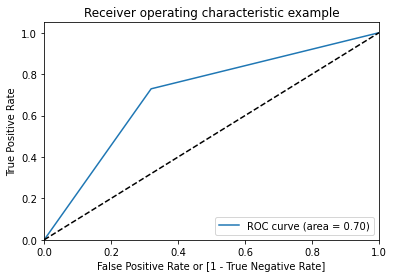

(array([0.        , 0.31940245, 1.        ]),
 array([0.        , 0.72912652, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [104]:
draw_roc(y_pred_final1.Default, y_pred_final1.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final1[i]= y_pred_final1.Default_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final1.head()

,ID,Default,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,99006,0.0,0.130524,0,1,1,0,0,0,0,0,0,0,0
1,56251,1.0,0.479086,0,1,1,1,1,1,0,0,0,0,0
2,155086,1.0,0.867846,1,1,1,1,1,1,1,1,1,1,0
3,126493,1.0,0.206189,0,1,1,1,0,0,0,0,0,0,0
4,115975,0.0,0.113872,0,1,1,0,0,0,0,0,0,0,0


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final1.Default, y_pred_final1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498002  0.000000  1.000000
0.1   0.1  0.539404  0.090477  0.991933
0.2   0.2  0.601919  0.239107  0.967642
0.3   0.3  0.656779  0.389961  0.925738
0.4   0.4  0.692356  0.546150  0.839735
0.5   0.5  0.704765  0.680598  0.729127
0.6   0.6  0.689008  0.803841  0.573253
0.7   0.7  0.645129  0.900542  0.387666
0.8   0.8  0.577927  0.963409  0.189351
0.9   0.9  0.515076  0.996043  0.030251


<AxesSubplot:xlabel='prob'>

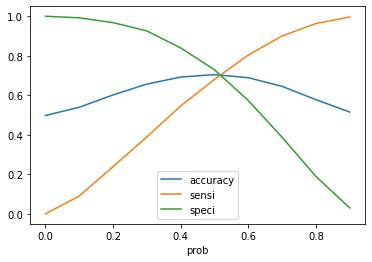

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.
